In [33]:
import pandas as pd
import plotly.express as px


In [34]:
#carico il dataset
url = "https://raw.githubusercontent.com/okHotel/ssd_project/master/data_set/monthly-sunspots.csv"
df = pd.read_csv(url)
print(df.head())

     Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0


In [35]:
#mesi in ordine crescente
df = df.sort_values(by=['Month'])
#faccio grafico
fig = px.line(df, x='Month', y='Sunspots', title='Monthly-sunspots over 350 years')
fig.show()

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p

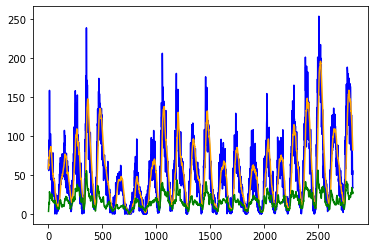

In [37]:
#vairanza -> qunato ogni valore si discosta dalla sua media
#deviazione standard
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 20

#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df.Sunspots.rolling(window, min_periods=1).mean()
rolling_std = df.Sunspots.rolling(window, min_periods=1).std()

#create two new DataFrame columns to hold values of upper and lower Bollinger bands
plt.plot(df.Sunspots, label='Dataset', color='blue')
plt.plot(rolling_mean, label='Rolling mean (w = 20)', color='orange')
plt.plot(rolling_std, label='Rolling standard deviation (w = 20)', color='green')

In [38]:
df['rolling_mean'] = rolling_mean
df['rolling_std'] = rolling_std
df[:10]

,Month,Sunspots,rolling_mean,rolling_std
0,1749-01,58.0,58.000000,NaN
1,1749-02,62.6,60.300000,3.252691
2,1749-03,70.0,63.533333,6.054200
3,1749-04,55.7,61.575000,6.306808
4,1749-05,85.0,66.260000,11.814313
5,1749-06,83.5,69.133333,12.696404
6,1749-07,94.8,72.800000,15.114342
7,1749-08,66.3,71.987500,14.180614
8,1749-09,75.9,72.422222,13.328708
9,1749-10,75.5,72.730000,12.604060


In [39]:
df1 = pd.DataFrame()
df1['Month'] = df.Month.copy()
df1['Sunspots'] = df.Sunspots.copy()

#df1.head()

In [40]:
rolling_mean = np.concatenate(([0], df.rolling_mean.values.copy()))
rolling_mean = np.resize(rolling_mean, rolling_mean.size -1)
df1['Prevision'] = rolling_mean


In [41]:
rolling_std = np.nan_to_num(np.concatenate(([0], df.rolling_std.values.copy())))
rolling_std = np.resize(rolling_std, rolling_std.size -1)
df1['rolling_std'] = rolling_std


In [42]:
df1['MinRange'] = df1['Prevision'] - df1['rolling_std']
df1['MaxRange'] = df1['Prevision'] + df1['rolling_std']


In [43]:
predicate = (df1['Sunspots'] <= df1['MaxRange']) & (df1['Sunspots'] >= df1['MinRange'])
df1['Class'] = np.where(predicate, '1', '0')
df1[:50]

,Month,Sunspots,Prevision,rolling_std,MinRange,MaxRange,Class
0,1749-01,58.0,0.000000,0.000000,0.000000,0.000000,0
1,1749-02,62.6,58.000000,0.000000,58.000000,58.000000,0
2,1749-03,70.0,60.300000,3.252691,57.047309,63.552691,0
3,1749-04,55.7,63.533333,6.054200,57.479134,69.587533,0
4,1749-05,85.0,61.575000,6.306808,55.268192,67.881808,0
5,1749-06,83.5,66.260000,11.814313,54.445687,78.074313,0
6,1749-07,94.8,69.133333,12.696404,56.436930,81.829737,0
7,1749-08,66.3,72.800000,15.114342,57.685658,87.914342,1
8,1749-09,75.9,71.987500,14.180614,57.806886,86.168114,1
9,1749-10,75.5,72.422222,13.328708,59.093515,85.750930,1


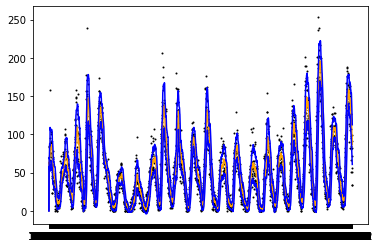

In [44]:
plt.plot(df1.Prevision, label='Prevision', color='orange')
plt.plot(df1.MinRange, label='MinRange', color='blue')
plt.plot(df1.MaxRange, label='MaxRange', color='blue')
plt.scatter(df1.Month, df1.Sunspots, label='x = Month, y = Sunspots', s = 1, color='black')
plt.show();

In [45]:
from sklearn.model_selection import train_test_split
X = df1[['Sunspots']].values.reshape(-1,1)
Y = df1[['Class']].values.reshape(-1,1).ravel()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.66,test_size=0.33)

In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=100, gamma=0.01)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [47]:
# nella matrice in pos[0,0] ho gli 0 giusti, 
# nella matrice in pos[1,1] ho gli 1 giusti
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[259 216]
 [213 243]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       475
           1       0.53      0.53      0.53       456

    accuracy                           0.54       931
   macro avg       0.54      0.54      0.54       931
weighted avg       0.54      0.54      0.54       931



In [48]:
#precision = true positive / true positive + false positive
#recall = true pos / true positive + false negative